<font color = "blue"><h1><b><center> Credit Card Fraud Detection </center></b></h1></font>

<font color = "blue"><h3><b><left>Objective :</left></b></h3></font>
<font color = "green"><h5><b><left>Predict fraudulent credit card transactions with the help of machine learning models. </left></b></h5></font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

<font color = "green"><h3><b> Loading Dataset </b></h3></font>

In [2]:
#file_path = 'D:\DataScientist\Creditcard_Fraud\Kaggle Source\creditcard.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Insights
#### Amount column is not normally distributed, before model building it should be normalised

<font color = "green"><h3><b> Exploratory data analysis </b></h3></font>

In [3]:
# let's print total rows and columns
print("Total Rows:",df.shape[0]," Total Columns:", df.shape[1])

Total Rows: 284807  Total Columns: 31


In [4]:
# Let's describe the data for better understanding
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Let's check for missing data
df.isnull().sum().max()

0

In [6]:
# Let's check for missing data for each column wise
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font><h5><b> It's clearly indicating there is no missing data </b></h5></font>

<font color = "green"><h3><b> Outlier analysis </b></h3></font>
<font color = "green"><h5><b> Dataset is already transformed with PCA, so assuming that the outliers are already treated. </b></h5></font>

In [7]:
# Let's understand total available classes
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### non-fraud labels : 284315       fraud labels : 492

#### It iscelarly indicating data is highly imbalanced.


<font color = "green"><h3><b> Here we will observe the distribution of our classes </b></h3></font>

In [8]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100, 2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

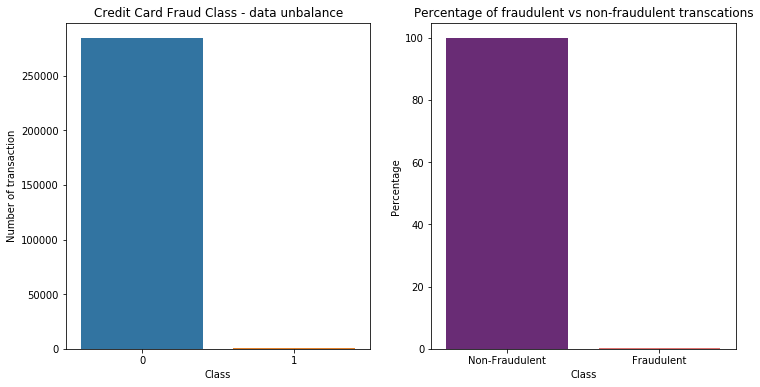

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage, palette="magma")
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [10]:
# Let's do percentage of imbalanced data
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


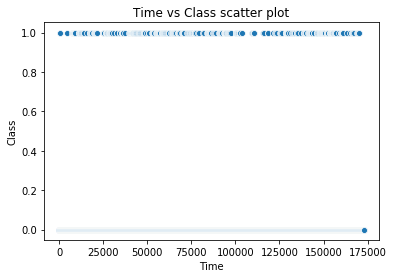

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

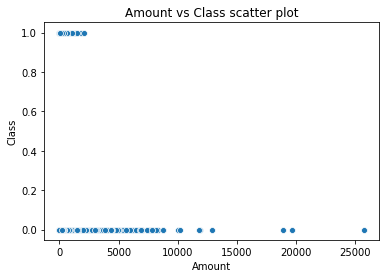

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#### Insights

##### Low amount transactions are more likely to be fraudulent

<font color = "green"><h3><b> Dropping Time column as this feature is not going to help in the model building.</b></h3></font>

In [13]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

<font color = "green"><h3><b> Plotting the distributions of all the featuers</b></h3></font>

<Figure size 432x288 with 0 Axes>

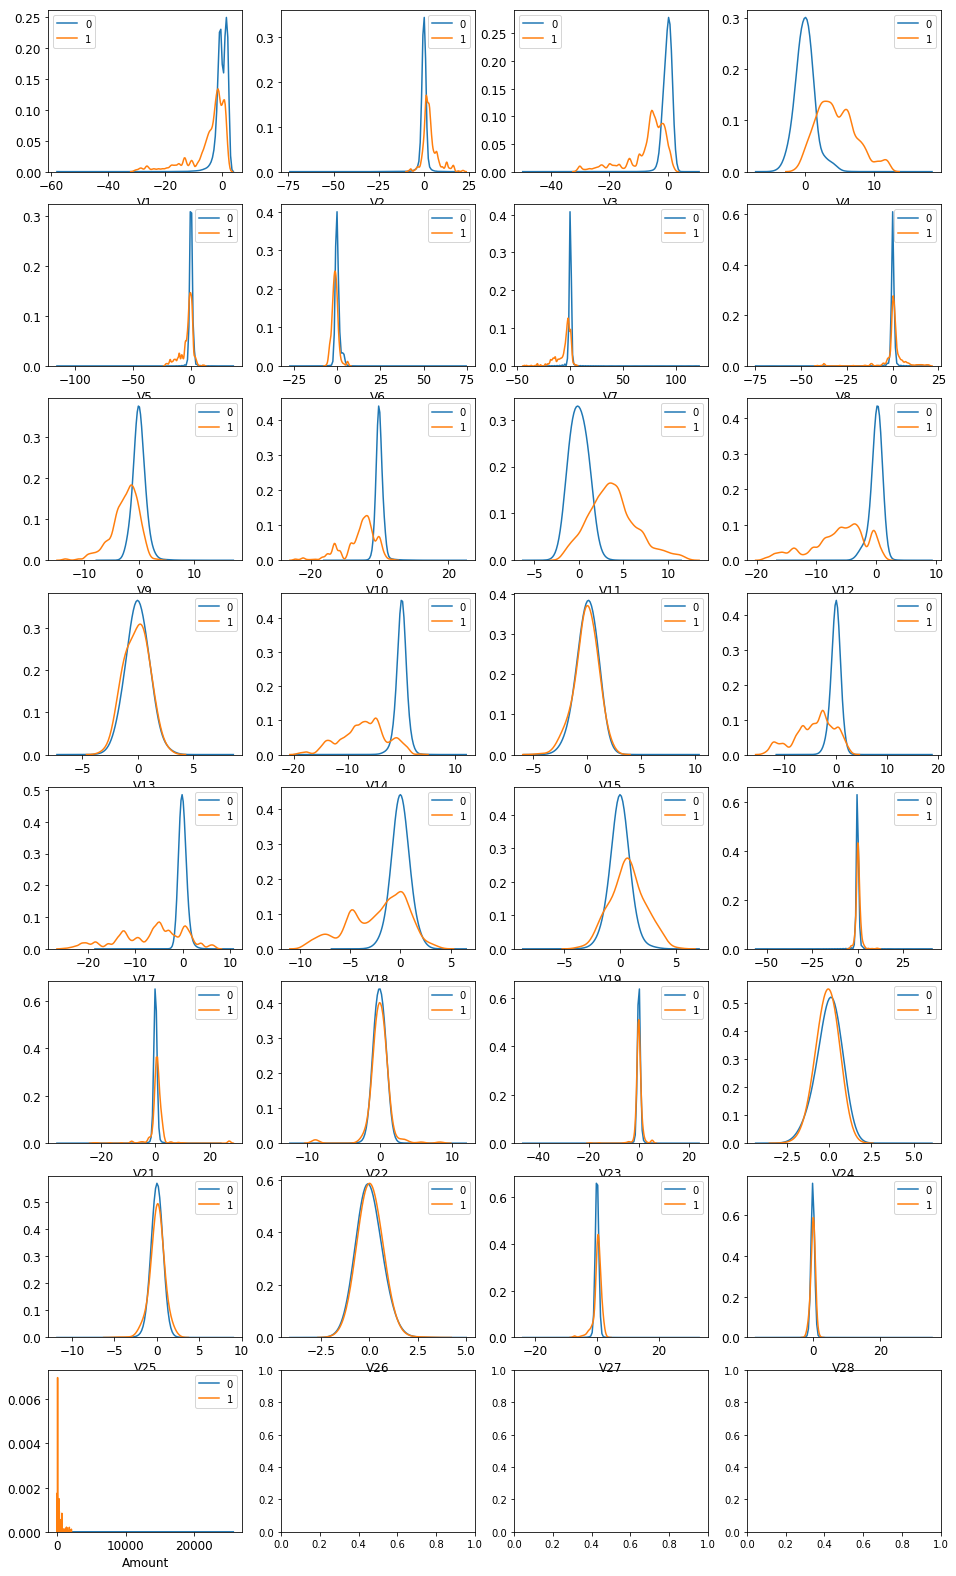

In [14]:
# Plotting all the variable to visualise the distribution

all_columns = list(df.columns.values)

# dropping Class columns from the list
all_columns.remove("Class")

i = 0
class_0 = df.loc[df['Class'] == 0]
class_1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in all_columns:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(class_0[feature], bw=0.5,label="0")
    sns.kdeplot(class_1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Insights
##### Most of the features distributions are overlapping

In [15]:
# let's print correlation matrix
cor = df.corr()
cor

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,...,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.101502,-0.216883


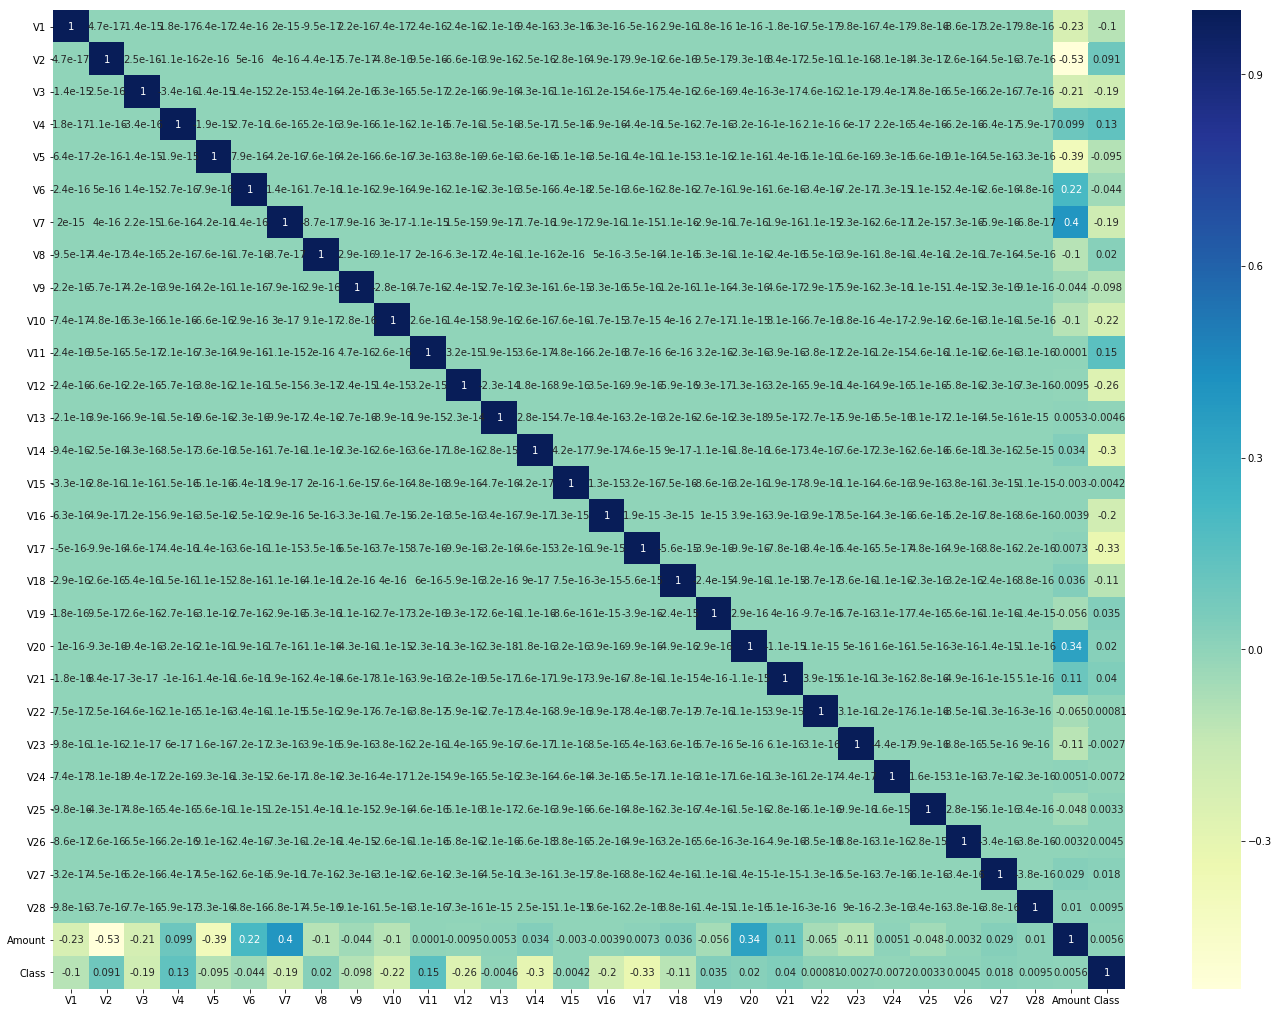

In [16]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [17]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


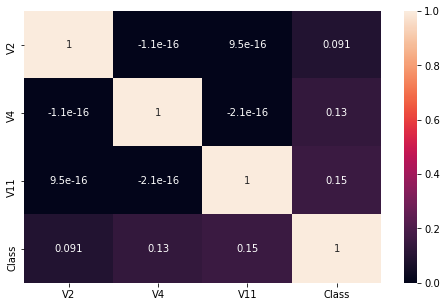

In [18]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

<font color = "green"><h3><b> Splitting the data into train & test data</b></h3></font>

In [19]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [20]:
from sklearn import model_selection

# Spltting the into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

<font color = "green"><h3><b> Preserve X_test & y_test to evaluate on the test data once you build the model</b></h3></font>

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


<font color = "green"><h3><b>Feature Scaling using Standard Scaler</b></h3></font>

In [22]:
# As we noticed in the begining, Amount column data is not in same scale ( randon)
# with PCA features from V1 to V28 are scaled.

#so scaling only Amount column
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [23]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [24]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Plotting the distribution of a variable

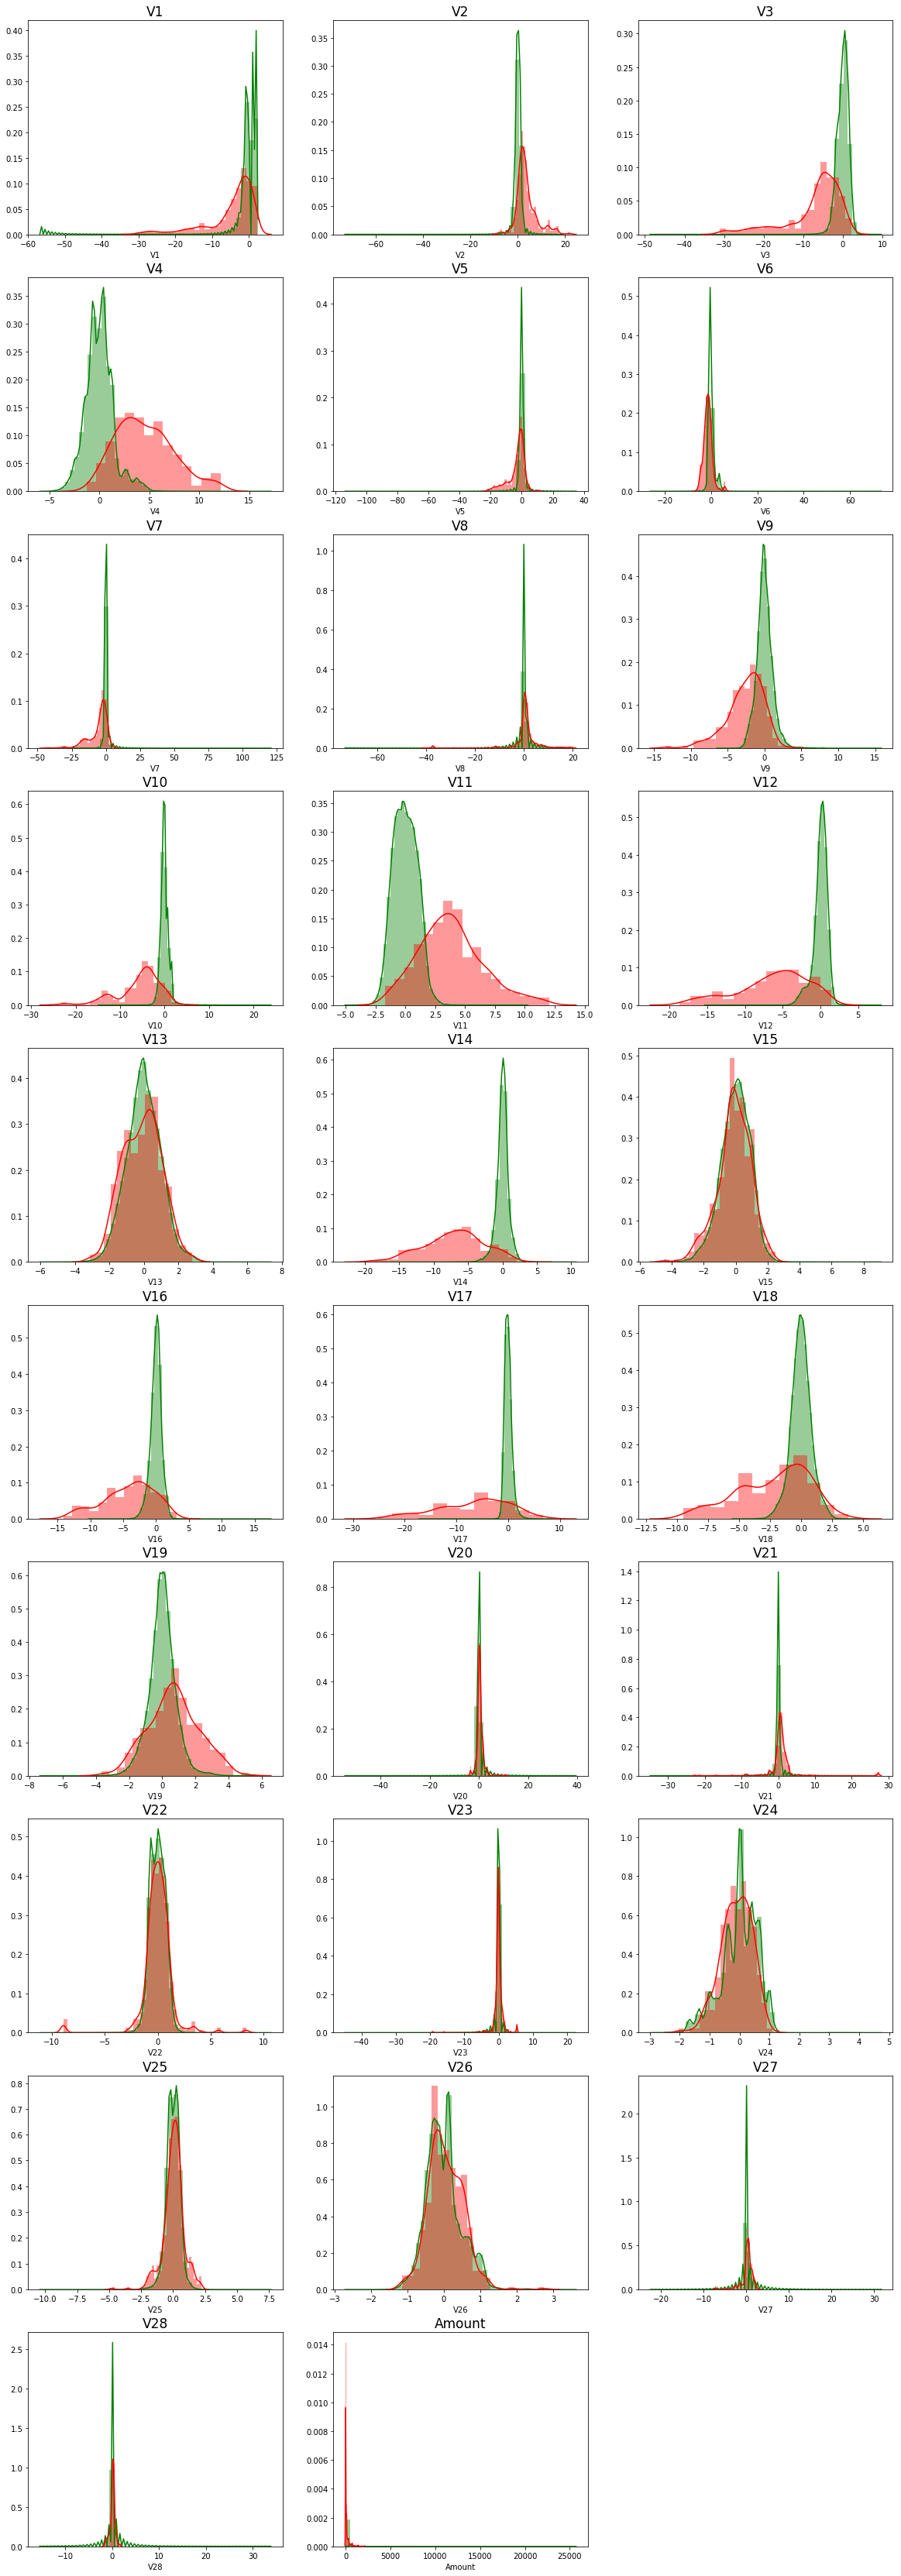

In [25]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

all_features = list(X.columns.values)

plt.figure(figsize=(20, 60))
for n, col in enumerate(all_features):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

### Insights
#### Most of the features are highly skewed. 
#### Check the skewness and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [26]:
# let's see the skewness of the features
all_features = X_train.columns
skew_list = []
for i in all_features:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(all_features, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.277668,-4.890421,-2.274281,0.687466,-2.806948,1.944495,3.180573,-8.851621,0.542097,1.112318,...,-1.810953,3.034115,-0.194068,-5.96524,-0.555467,-0.423168,0.579692,-0.77311,11.134475,18.155243


In [27]:
# Lets's print the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


<font color = "green"><h3><b> skewness present in the distribution of the above features </b></h3></font>

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [28]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

In [29]:
# power transformatin on whole data set
pt1 = PowerTransformer()
pt1.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt1.transform(X_train)    ## Then apply on all data
X_test_pt = pt1.transform(X_test)

#Create Dataframe
all_features = list(X.columns.values)

X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=all_features)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=all_features)

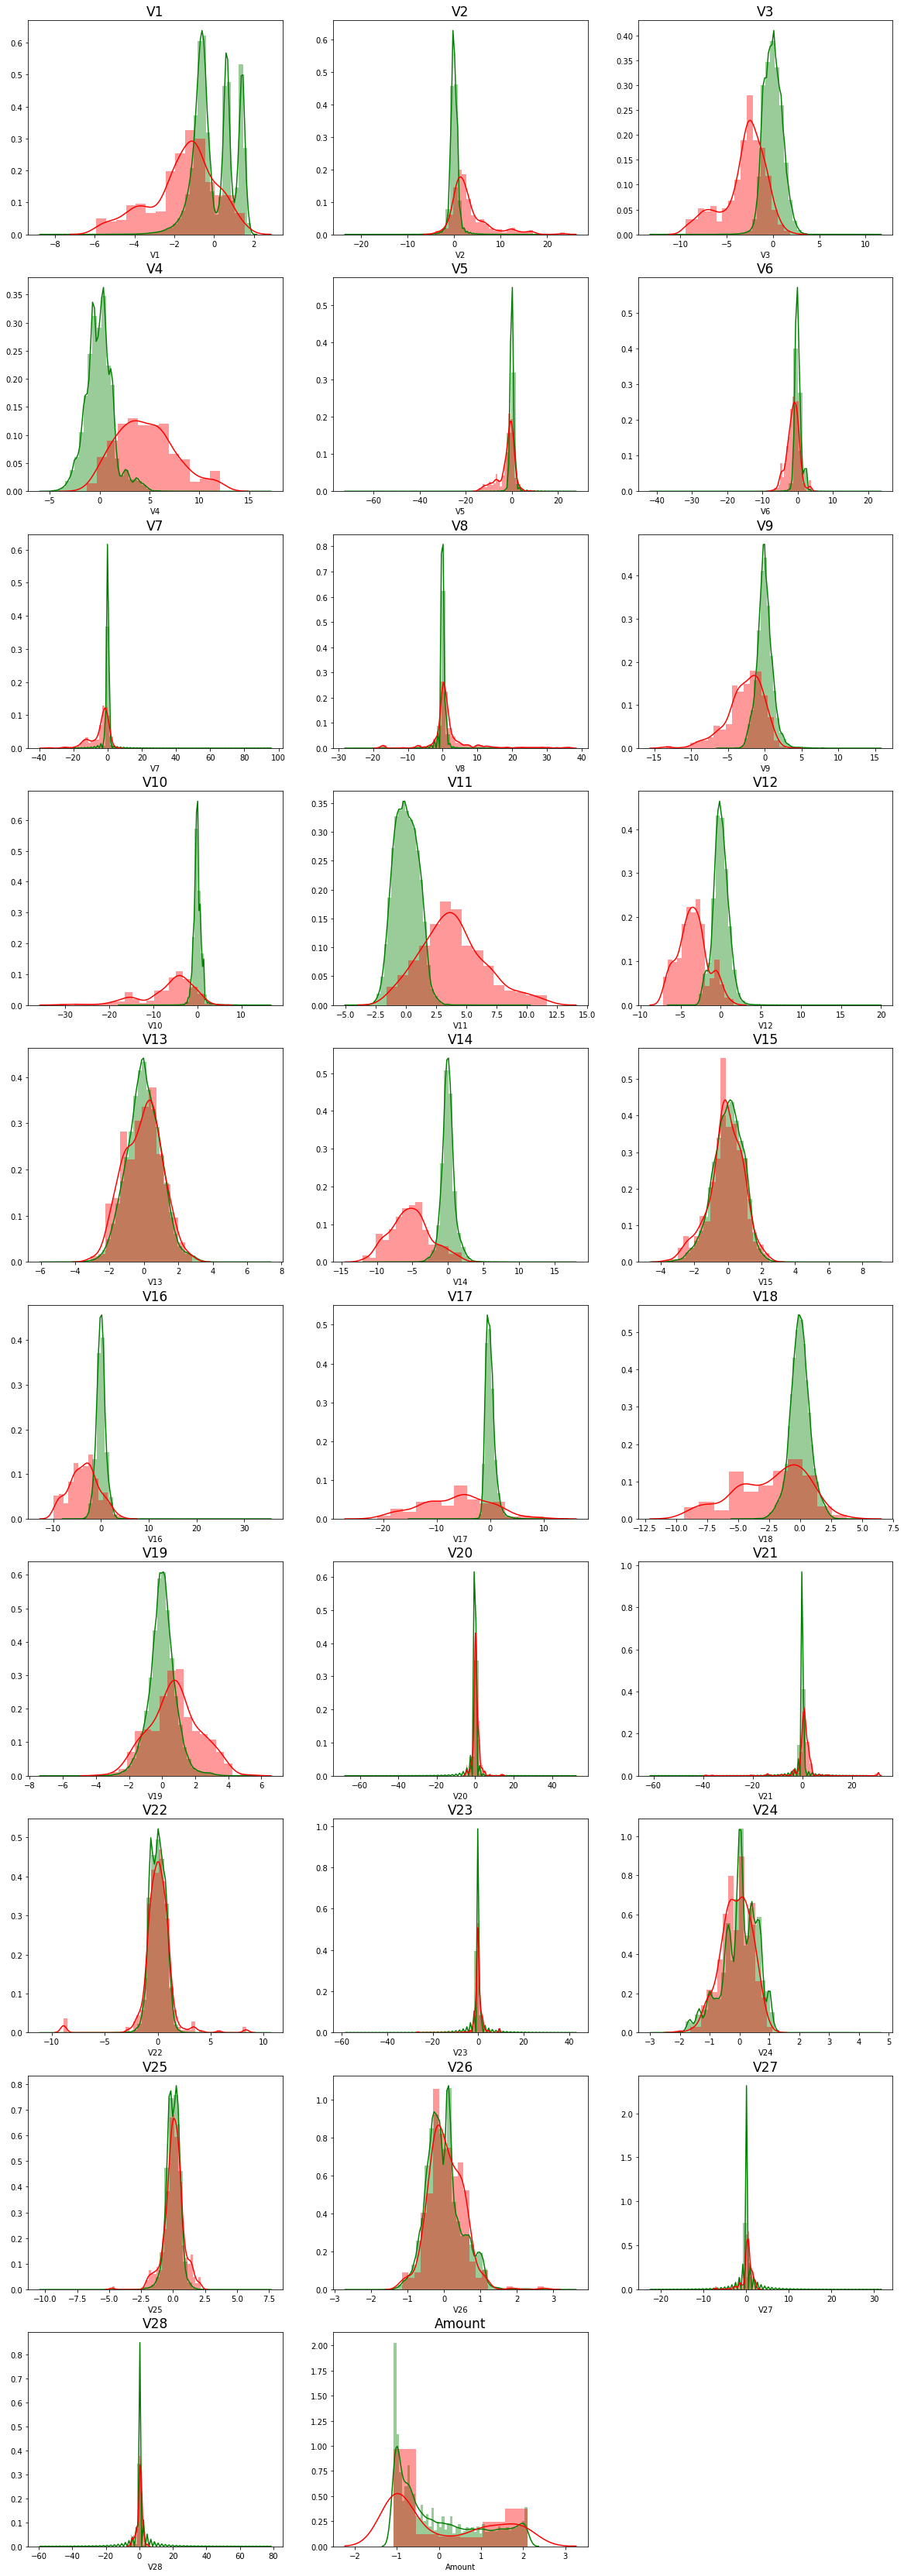

In [30]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(all_features):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train[col][normal_records], color='green')
    sns.distplot(X_train[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

<font color = "green"><h2><b> Model Building </b></h2></font>
<font color = "green"><h3><b> Build different models on the imbalanced dataset and see the result</b></h3></font>

- KNN
- SVM
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

<font color = "green"><h3><b>Metric selection on imbalance data</b></h3></font>

As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

So We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. 

In [31]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998262
1    0.001738
Name: Class, dtype: float64

<font color = "green"><h3><b>Custom Funtions</b></h3></font>

In [32]:
def get_logisticregression_model(X_train_data, y_train_data):
    # K-fold cross vaidation
    params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
    folds = KFold(n_splits=5, shuffle=True, random_state=4)

    # cross validation
    model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

    # hyperparameter tuning
    model_cv.fit(X_train_data, y_train_data)

    # evaluation metric
    print('Best ROC AUC score: ', model_cv.best_score_)

    # optimum value of hyperparameters
    print('Best hyperparameters: ', model_cv.best_params_)
    
    return model_cv

In [33]:
def get_decisiontree_model(X_train_data, y_train_data):
    # Create the parameter grid 
    param_grid = {
        'max_depth': range(5, 15, 5),
        'min_samples_leaf': range(50, 150, 50),
        'min_samples_split': range(50, 150, 50),
    }

    # Instantiate the grid search model
    dtree = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

    # Fit the grid search to the data
    grid_search.fit(X_train_data, y_train_data)
    
    return grid_search

In [34]:
# custom function to display ROC-AUC score, f1 score and classification report
def print_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [35]:
# plot of C versus train and validation scores
def plot_C_train_validation_scores(results):
    plt.figure(figsize=(8, 6))
    plt.plot(results['param_C'], results['mean_test_score'])
    plt.plot(results['param_C'], results['mean_train_score'])
    plt.xlabel('C')
    plt.ylabel('sensitivity')
    plt.legend(['test result', 'train result'], loc='upper left')
    plt.xscale('log')

In [36]:
# Print ROC Curve
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [37]:
def get_xgboost_model(X_train_data, y_train_data):
    # creating a KFold object 
    folds = 3

    # specify range of hyperparameters
    param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


    # specify model
    xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train_data, y_train_data)
    
    return model_cv

In [38]:
def get_final_xgboost_model(X_train_adasyn_data, y_train_adasyn_data):
    xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

    xgb_model.fit(X_train_adasyn_data, y_train_adasyn_data ) # fit on the balanced dataset
    
    return xgb_model

In [39]:
def get_KNN_model(df_Results, DataImabalance, X_train, y_train, X_test, y_test ):
    #Evaluate KNN  model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score
    
    knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print('-'*100)
    print(score)
  
    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    
    print("classification Report")
    print('-'*100)
    print(classification_report(y_test, y_pred))
    print('-'*100 )
    knn_probs = knn.predict_proba(X_test)[:, 1]
    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print('-'*100)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print('-'*100)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [40]:
def get_SVM_model(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print('-'*100)
    print("classification Report")
    print('-'*100 )
    print(classification_report(y_test, y_pred_SVM))
    
    # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
  
    print('-'*100)
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [41]:
def get_randomforest_model(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    
    #Evaluate Random Forest model
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt', random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))
    
    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    
    print("classification Report")
    print('-'*100 )
    print(classification_report(y_test, rf_predictions))
    
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print('-'*100)
    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    
    print('-'*100)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

<font color = "green"><h3><b>1. KNN</b></h3></font>

KNN Model
model score
----------------------------------------------------------------------------------------------------
0.9993504441557529
classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
KNN roc_value: 0.9008411770653818
KNN threshold: 0.2
----------------------------------------------------------------------------------------------------
ROC for the test dataset 90.1%


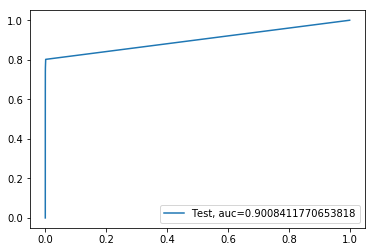

----------------------------------------------------------------------------------------------------


In [42]:
#Run KNN Model
print("KNN Model")
df_Results = get_KNN_model(df, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print('-'*100 )

<font color = "green"><h3><b>2. SVM</b></h3></font>

In [43]:
# Perfrom RepeatedKFold
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

SVM Model with Sigmoid Kernel
accuracy_score : 0.9983497480732431
----------------------------------------------------------------------------------------------------
classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.08      0.15        97

    accuracy                           1.00     56961
   macro avg       0.81      0.54      0.57     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
SVM roc_value: 0.45387040303070736
SVM threshold: 0.0017781126082312938
ROC for the test dataset 45.4%


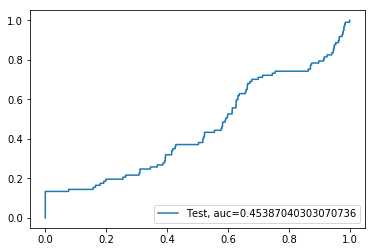

In [44]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
df_Results = get_SVM_model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

<font color = "green"><h3><b>3. Logistic Regression</b></h3></font>

In [45]:
logistic_model_cv = get_logisticregression_model(X_train , y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9842306487403991
Best hyperparameters:  {'C': 0.01}


In [46]:
# cross validation results
logistic_cv_results = pd.DataFrame(logistic_model_cv.cv_results_)
logistic_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.594507,0.112657,0.029614,0.001321,0.01,{'C': 0.01},0.988111,0.989473,0.968193,0.981371,...,0.984231,0.008983,1,0.984609,0.984928,0.988887,0.986248,0.983147,0.985564,0.001932
1,2.390950,0.101373,0.029655,0.001034,0.1,{'C': 0.1},0.986457,0.986973,0.957050,0.978143,...,0.979843,0.012104,2,0.980840,0.982840,0.986427,0.982473,0.979651,0.982446,0.002298
2,2.650728,0.077918,0.029022,0.001871,1,{'C': 1},0.985974,0.985911,0.953260,0.977034,...,0.978310,0.013176,3,0.979680,0.982083,0.985731,0.981393,0.978714,0.981520,0.002422
3,2.693159,0.048905,0.029695,0.001705,10,{'C': 10},0.985921,0.985791,0.952698,0.976915,...,0.978114,0.013351,4,0.979540,0.981989,0.985656,0.981261,0.978604,0.981410,0.002440
4,2.678441,0.180133,0.028836,0.001124,100,{'C': 100},0.985912,0.985776,0.952624,0.976910,...,0.978091,0.013374,5,0.979526,0.981979,0.985649,0.981248,0.978592,0.981399,0.002441
5,2.398518,0.292854,0.024262,0.005654,1000,{'C': 1000},0.985912,0.985774,0.952621,0.976908,...,0.978089,0.013374,6,0.979525,0.981979,0.985649,0.981247,0.978591,0.981398,0.002442


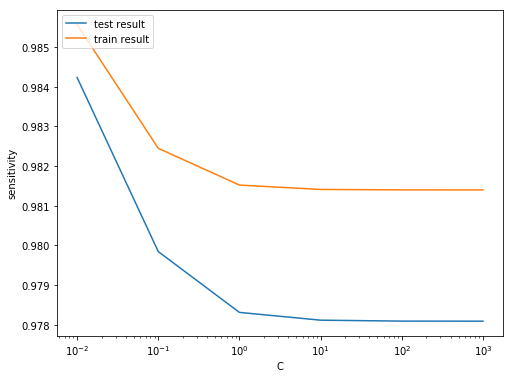

In [47]:
# print C versus train and validation scores
plot_C_train_validation_scores(logistic_cv_results)

<font color = "green"><h5><b>Logistic Regression with optimal C</b></h5></font>

In [48]:
# model with best C
log_reg_imb_model = LogisticRegression(C=logistic_model_cv.best_params_['C'])

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

<font color = "green"><h5><b>Prediction and model evalution on the train set</b></h5></font>

In [49]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [50]:
print_scores(y_train, y_train_pred)

F1 Score: 77.24%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [51]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

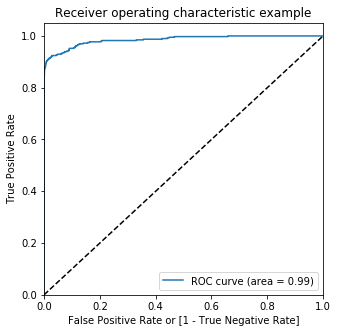

In [52]:
# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on the test set</b></h3></font>

In [53]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
print_scores(y_test, y_test_pred)

F1 Score: 66.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.56      0.66        96

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [54]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

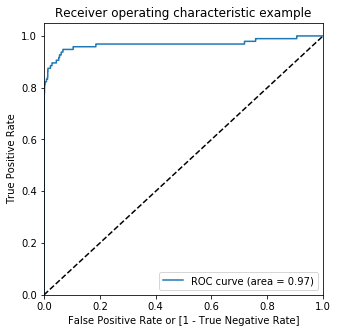

In [55]:
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Insights
##### We can see very good ROC on the test data set 0.97

<font color = "green"><h3><b>Model Summary</b></h3></font> 

- Train set
    - ROC : 99%
    - F1 Score: 77.24%
    
- Test set
    - ROC : 97%
    - F1 score: 66.26%

<font color = "green"><h3><b>4. Descission Tree</b></h3></font>

In [56]:
descissiontree_grid_search = get_decisiontree_model(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [57]:
# cv results
descissiontree_cv_results = pd.DataFrame(descissiontree_grid_search.cv_results_)
descissiontree_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.070762,0.014057,0.041063,0.003349,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,4
1,5.000594,0.050416,0.040081,0.002488,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923870,0.930129,0.004426,5
2,4.951218,0.019919,0.040036,0.002667,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,4.963133,0.008829,0.038454,0.000463,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,2
4,9.941787,0.014334,0.040876,0.000380,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917554,0.923875,0.937997,0.926476,0.008546,6
5,9.826481,0.062431,0.043073,0.001877,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924927,0.923901,0.930473,0.926434,0.002887,7
6,9.701448,0.011213,0.039378,0.000296,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933407,0.919663,0.944092,0.932387,0.009999,3
7,9.698209,0.009857,0.029934,0.006512,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933425,0.919679,0.921773,0.924959,0.006047,8


In [58]:
# Printing the optimal score and hyperparameters
print("Best ROC AUC score : ", descissiontree_grid_search.best_score_)
print(descissiontree_grid_search.best_estimator_)

Best ROC AUC score :  0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


<font color = "green"><h3><b>Decision Tree with optimal hyperparameters</b></h3></font>

In [59]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth= descissiontree_grid_search.best_estimator_.max_depth, 
                                  min_samples_leaf=descissiontree_grid_search.best_estimator_.min_samples_leaf,
                                  min_samples_split=descissiontree_grid_search.best_estimator_.min_samples_split)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

<font color = "green"><h3><b>Prediction on the train set</b></h3></font>

In [60]:
y_train_pred = dt_imb_model.predict(X_train)
print_scores(y_train, y_train_pred)

F1 Score: 74.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



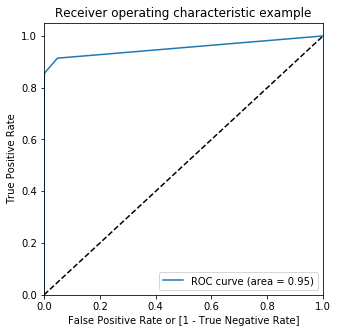

In [61]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on the test set</b></h3></font>

In [62]:
y_test_pred = dt_imb_model.predict(X_test)
print_scores(y_test, y_test_pred)

F1 Score: 61.54%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



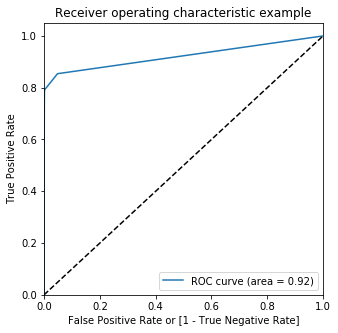

In [63]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font> 

- Train set
    - ROC Score: 95%
    - F1 score : 74.9%
    
- Test set
    - ROC Score: 92%
    - F1 score : 61.54%

<font color = "green"><h3><b>5. Random Forest</b></h3></font> 

Random Forest Model
Model Accuracy: 0.9995259914678464
classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.75      0.84        97

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
Random Forest roc_value: 0.9414362320080757
Random Forest threshold: 0.01
----------------------------------------------------------------------------------------------------
ROC for the test dataset 94.1%


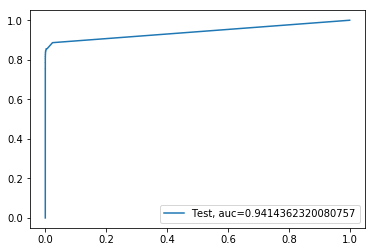

--------------------------------------------------------------------------------


In [64]:
#Run Random Forest Model
print("Random Forest Model")

df_Results = get_randomforest_model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

print('-'*80 )

<font color = "green"><h3><b>6. XGBoost</b></h3></font> 

In [65]:
xgboost_cv = get_xgboost_model(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[11:37:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

In [66]:
# cv results
xgboost_cv_results = pd.DataFrame(xgboost_cv.cv_results_)
xgboost_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,17.711954,0.079884,0.099901,0.000746,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978249,0.971801,0.981423,0.977158,0.004003,1,0.999892,0.999940,0.999847,0.999893,0.000038
1,26.370054,0.279112,0.099415,0.002013,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3,0.999966,0.999987,0.999966,0.999973,0.000010
2,32.161313,0.151490,0.100089,0.000836,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.969637,0.980136,0.975966,0.004550,2,0.999950,0.999982,0.999911,0.999948,0.000029
3,16.927832,0.065359,0.101436,0.000881,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961154,0.974478,0.973303,0.969645,0.006023,6,0.999999,1.000000,0.999995,0.999998,0.000002
4,24.580028,0.262989,0.099219,0.003312,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965527,0.983906,0.973348,0.007748,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,30.535809,0.290966,0.100776,0.000962,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [67]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgboost_cv.best_score_)
print(xgboost_cv.best_estimator_)

Best roc auc score :  0.9771577449849703
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [68]:
# Printing best params
xgboost_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

<font color = "green"><h3><b>XGBoost model with optimal hyperparameter</b></h3></font>

In [69]:
# Printing best params
params = {'learning_rate': xgboost_cv.best_estimator_.learning_rate,
          'max_depth': xgboost_cv.best_estimator_.max_depth, 
          'n_estimators':xgboost_cv.best_estimator_.n_estimators,
          'subsample':xgboost_cv.best_estimator_.subsample,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[11:45:18] WARNING: ../src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<font color = "green"><h3><b>Model evaluation on train set</b></h3></font>

In [70]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

print_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



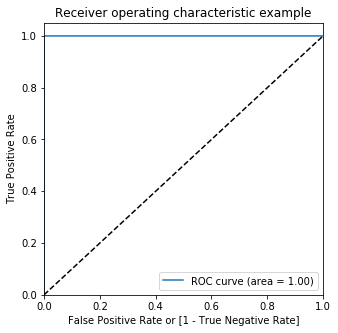

In [71]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba_imb_xgb)

<font color = "green"><h3><b>Evaluating the model on the test set</b></h3></font>

In [72]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
print_scores(y_test, y_test_pred)

F1 Score: 82.29%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



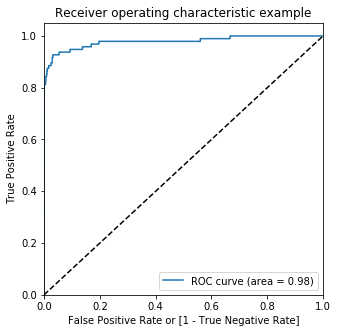

In [73]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>

- Train set
    - ROC score: 100%
    - F1 score: 100%
- Test set
    - ROC score: 98%
    - F1 score: 82.29%

### Insights
<font color = "green"><h5><b>XGBoost model is giving good performance on the unbalanced data among these 3 models.
ROC-AUC score on the train data is 100% and on test data 98%.</b></h5></font>

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


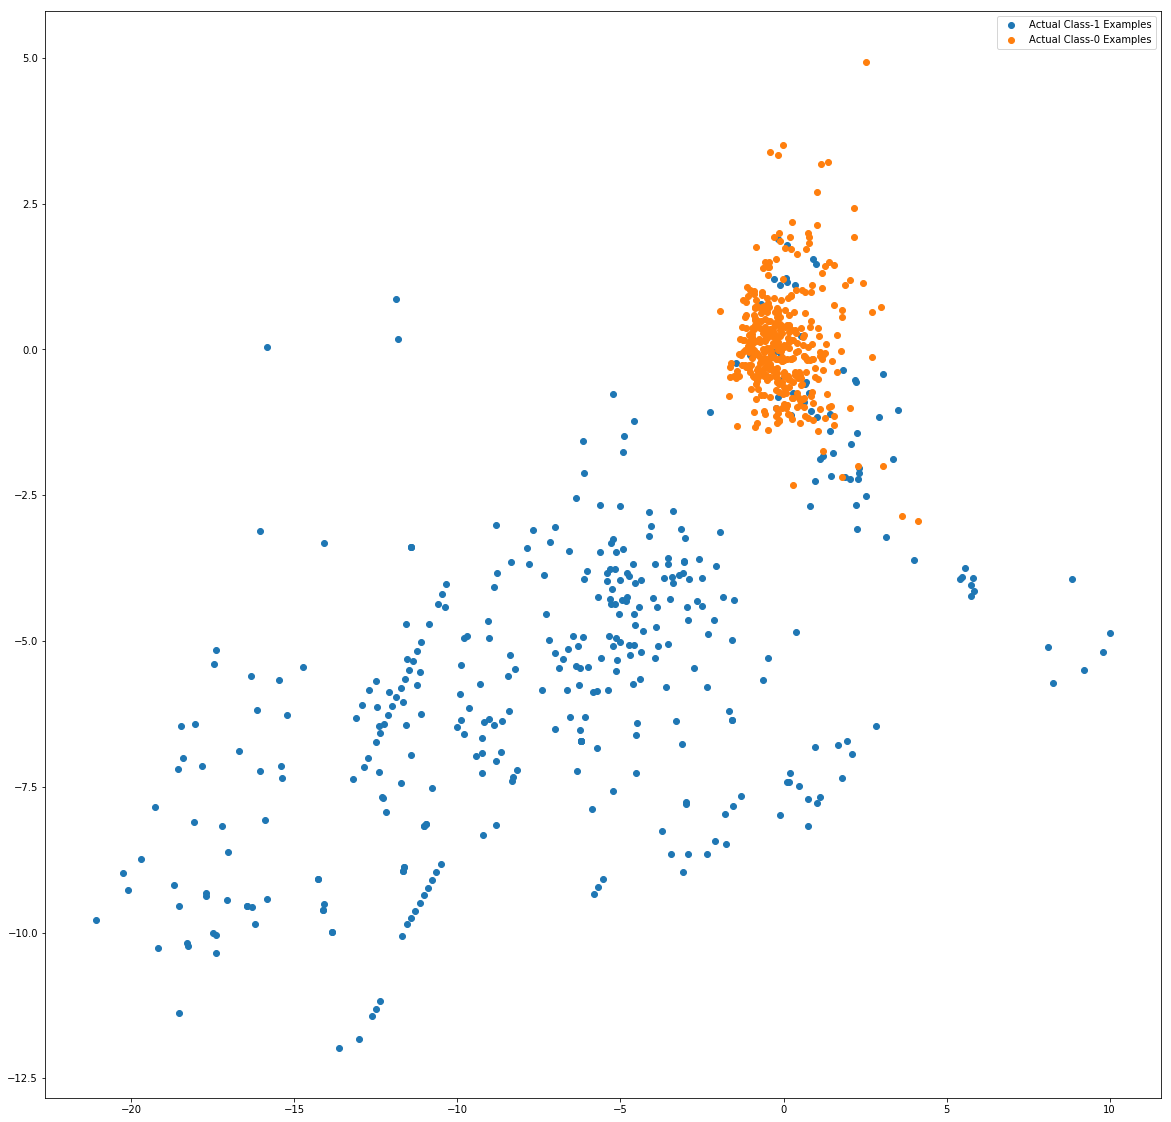

In [74]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [75]:
X_train.values[np.where(y_train==1.0)]

array([[-0.13053876,  0.92224534, -0.80073295, ...,  0.62854462,
         0.98453119, -1.04758951],
       [-0.05811894,  1.9737175 , -2.90883075, ...,  0.62086654,
         0.57793208, -1.03898965],
       [-1.53550244,  2.01502902, -1.86548175, ..., -0.310519  ,
        -2.36942793,  0.51333898],
       ...,
       [-1.57947539, -0.01892623, -2.99141255, ...,  1.03601138,
         0.02519915,  1.88830564],
       [-0.94257523,  2.93198306, -3.43037091, ...,  0.31815229,
        -1.00418599, -0.99349379],
       [-3.65732192, 12.40116665, -4.2431575 , ...,  1.26956636,
         2.79996498, -1.03898965]])

<font color = "green"><h3><b>Print the FPR,TPR & select the best threshold from the roc curve for the best model</b></h3></font>

In [76]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.84747875


<font color = "green"><h3><b>Model building with balancing Classes</b></h3></font> 

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

<font color = "green"><h3><b>Model Building</b></h3></font> 
- Build different models on the balanced dataset

<font color = "green"><h3><b>Random Oversampling</b></h3></font>

In [77]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over_sample, y_over_sample = oversample.fit_resample(X_train, y_train)

In [78]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over_sample))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


<font color = "green"><h3><b>1. Logistic Regrassion with Random Oversampling</b></h3></font>

In [79]:
os_logistic_model_cv = get_logisticregression_model(X_over_sample, y_over_sample)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9884507888753495
Best hyperparameters:  {'C': 10}


In [80]:
# cross validation results
os_logistic_cv_results = pd.DataFrame(os_logistic_model_cv.cv_results_)
os_logistic_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.569350,0.224587,0.050541,0.003581,0.01,{'C': 0.01},0.988856,0.987867,0.988621,0.988429,...,0.988430,0.000328,6,0.988387,0.988493,0.988418,0.988528,0.988421,0.988449,0.000052
1,4.374910,0.154020,0.050421,0.001938,0.1,{'C': 0.1},0.988858,0.987896,0.988655,0.988449,...,0.988450,0.000322,5,0.988413,0.988511,0.988437,0.988543,0.988435,0.988468,0.000050
2,4.509198,0.127532,0.050141,0.002333,1,{'C': 1},0.988859,0.987895,0.988656,0.988448,...,0.988450,0.000323,4,0.988415,0.988513,0.988437,0.988544,0.988437,0.988469,0.000050
3,4.565718,0.099146,0.048620,0.003841,10,{'C': 10},0.988860,0.987895,0.988657,0.988448,...,0.988451,0.000323,1,0.988415,0.988513,0.988437,0.988544,0.988436,0.988469,0.000050
4,4.458369,0.078336,0.051239,0.002538,100,{'C': 100},0.988860,0.987895,0.988657,0.988448,...,0.988451,0.000323,3,0.988415,0.988513,0.988437,0.988544,0.988436,0.988469,0.000050
5,3.788462,0.759819,0.040868,0.009301,1000,{'C': 1000},0.988860,0.987895,0.988657,0.988448,...,0.988451,0.000323,2,0.988415,0.988513,0.988437,0.988544,0.988436,0.988469,0.000050


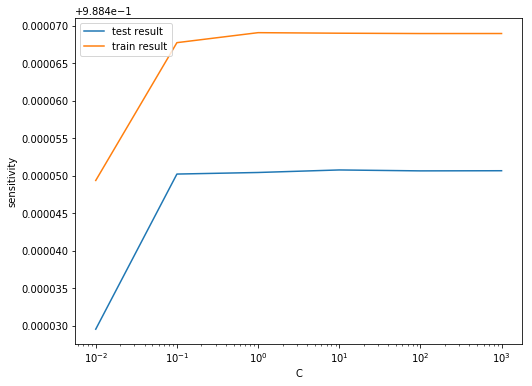

In [81]:
plot_C_train_validation_scores(os_logistic_cv_results)

 <font color = "green"><h3><b>Logistic Regression with hyperparameter tuning</b></h3></font>    

In [84]:
os_logistic_model_cv.best_params_

{'C': 10}

In [85]:
# Instantiating the model
logreg_over = LogisticRegression(C=os_logistic_model_cv.best_params_['C'])

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over_sample, y_over_sample)

<font color = "green"><h3><b>Evaluating the model on train data</b></h3></font>

In [86]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over_sample)

In [87]:
# Printing scores
print_scores(y_over_sample, y_train_pred)

F1 Score: 94.83%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



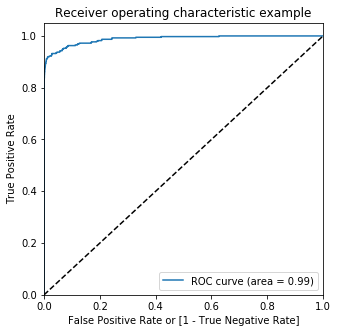

In [88]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over_sample)[:,1]
# Plot the ROC curve
plot_roc(y_over_sample, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating on test data</b></h3></font>

In [89]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
print_scores(y_test, y_test_pred)

F1 Score: 11.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



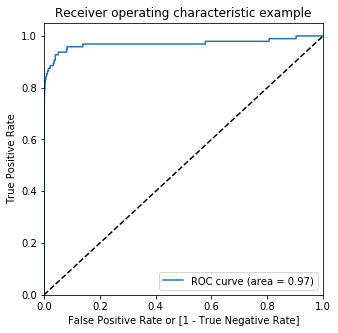

In [90]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>
- Train set
    - ROC score : 99%
    - F1 score: 94.83%
- Test set
    - ROC score : 97%
    - F1 score: 11.3%

<font color = "green"><h3><b>2. Decision Tree with Random Oversampling</b></h3></font>

In [91]:
os_dt_grid_search= get_decisiontree_model(X_over_sample, y_over_sample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [92]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", os_dt_grid_search.best_score_)
print(os_dt_grid_search.best_estimator_)

Best roc auc score :  0.9996371137481042
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


<font color = "green"><h3><b>Decision Tree with optimal hyperparameters</b></h3></font>

In [93]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=os_dt_grid_search.best_estimator_.max_depth, 
                                  min_samples_leaf=os_dt_grid_search.best_estimator_.min_samples_leaf,
                                  min_samples_split=os_dt_grid_search.best_estimator_.min_samples_split)

dt_over_model.fit(X_over_sample, y_over_sample)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

<font color = "green"><h3><b>Model evatuation on train data</b></h3></font>

In [94]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over_sample)
print_scores(y_over_sample, y_train_pred)

F1 Score: 99.67%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



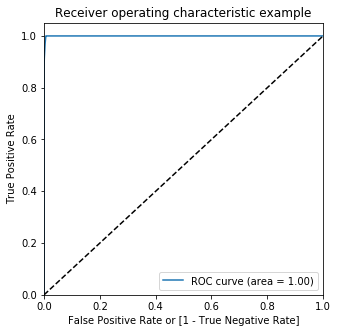

In [95]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over_sample)[:,1]
# Plot the ROC curve
plot_roc(y_over_sample, y_train_pred_proba)

<font color = "green"><h3><b>Predictions on the test set</b></h3></font>

In [96]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
print_scores(y_test, y_test_pred)

F1 Score: 25.25%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.25        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



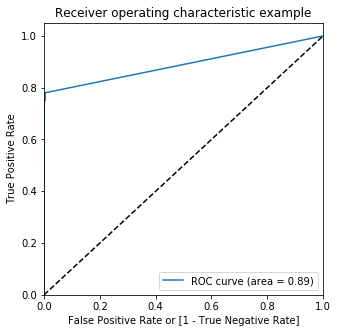

In [97]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>

- Train set
    - ROC score : 100%
    - F1 score: 99.66%
- Test set
    - ROC score : 89%
    - F1 score: 25.25%

<font color = "green"><h3><b>3. XGBoost with Random Oversampling</b></h3></font>

In [98]:
os_xgboost_cv = get_xgboost_model(X_over_sample, y_over_sample)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[11:53:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

In [99]:
# cv results
os_xgboost_cv_results = pd.DataFrame(os_xgboost_cv.cv_results_)
os_xgboost_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,29.834246,0.084712,0.187461,0.000707,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999896,0.999925,0.999905,0.999909,0.000012,6,0.999915,0.999928,0.999928,0.999924,6.315099e-06
1,39.030078,0.143643,0.185323,0.000190,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999899,0.999933,0.999911,0.999914,0.000014,4,0.999917,0.999944,0.999928,0.999930,1.103655e-05
2,44.396998,0.140507,0.179300,0.007474,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999906,0.999922,0.999904,0.999911,0.000008,5,0.999921,0.999930,0.999923,0.999925,3.696506e-06
3,29.674095,0.043119,0.186573,0.001852,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999992,0.999983,0.999973,0.999983,0.000008,3,0.999994,0.999994,1.000000,0.999996,2.734686e-06
4,39.126358,0.092254,0.183753,0.002073,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999983,0.999980,0.999987,0.000007,2,0.999999,0.999998,1.000000,0.999999,7.072483e-07
5,43.781208,0.223519,0.186740,0.001755,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999997,0.999992,0.999980,0.999990,0.000007,1,0.999999,0.999998,0.999999,0.999999,3.701413e-07


In [100]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", os_xgboost_cv.best_score_)
print(os_xgboost_cv.best_estimator_)

Best roc auc score :  0.9999896953077251
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [101]:
os_xgboost_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

<font color = "green"><h3><b>XGBoost with optimal hyperparameter</b></h3></font>

In [102]:
# chosen hyperparameters
params = {'learning_rate': os_xgboost_cv.best_estimator_.learning_rate,
          'max_depth': os_xgboost_cv.best_estimator_.max_depth, 
          'n_estimators':os_xgboost_cv.best_estimator_.n_estimators,
          'subsample':os_xgboost_cv.best_estimator_.subsample,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over_sample, y_over_sample)

[12:05:37] WARNING: ../src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<font color = "green"><h3><b>Model evatuation on train data</b></h3></font>

In [103]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over_sample)

print_scores(y_over_sample, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



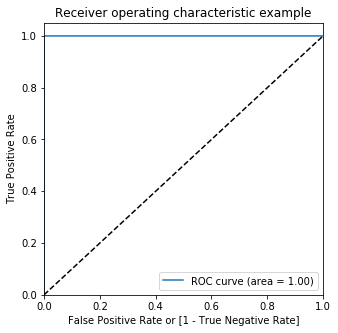

In [104]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over_sample)[:,1]

# Plot the ROC curve
plot_roc(y_over_sample, y_train_pred_proba)

<font color = "green"><h3><b>Model evaluation on the test set</b></h3></font>

In [105]:
y_pred = xgb_over_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 83.98%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.79      0.84        96

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



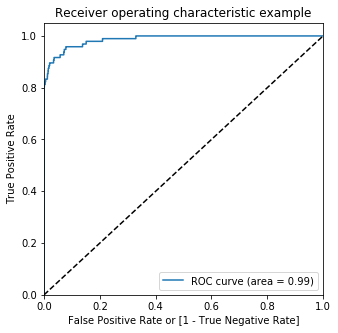

In [106]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font> 
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 83.98%

<font color = "green"><h3><b>SMOTE (Synthetic Minority Oversampling Technique)</b></h3></font>

<font color = "green"><h3><b> Print the class distribution after applying SMOTE </b></h3></font>

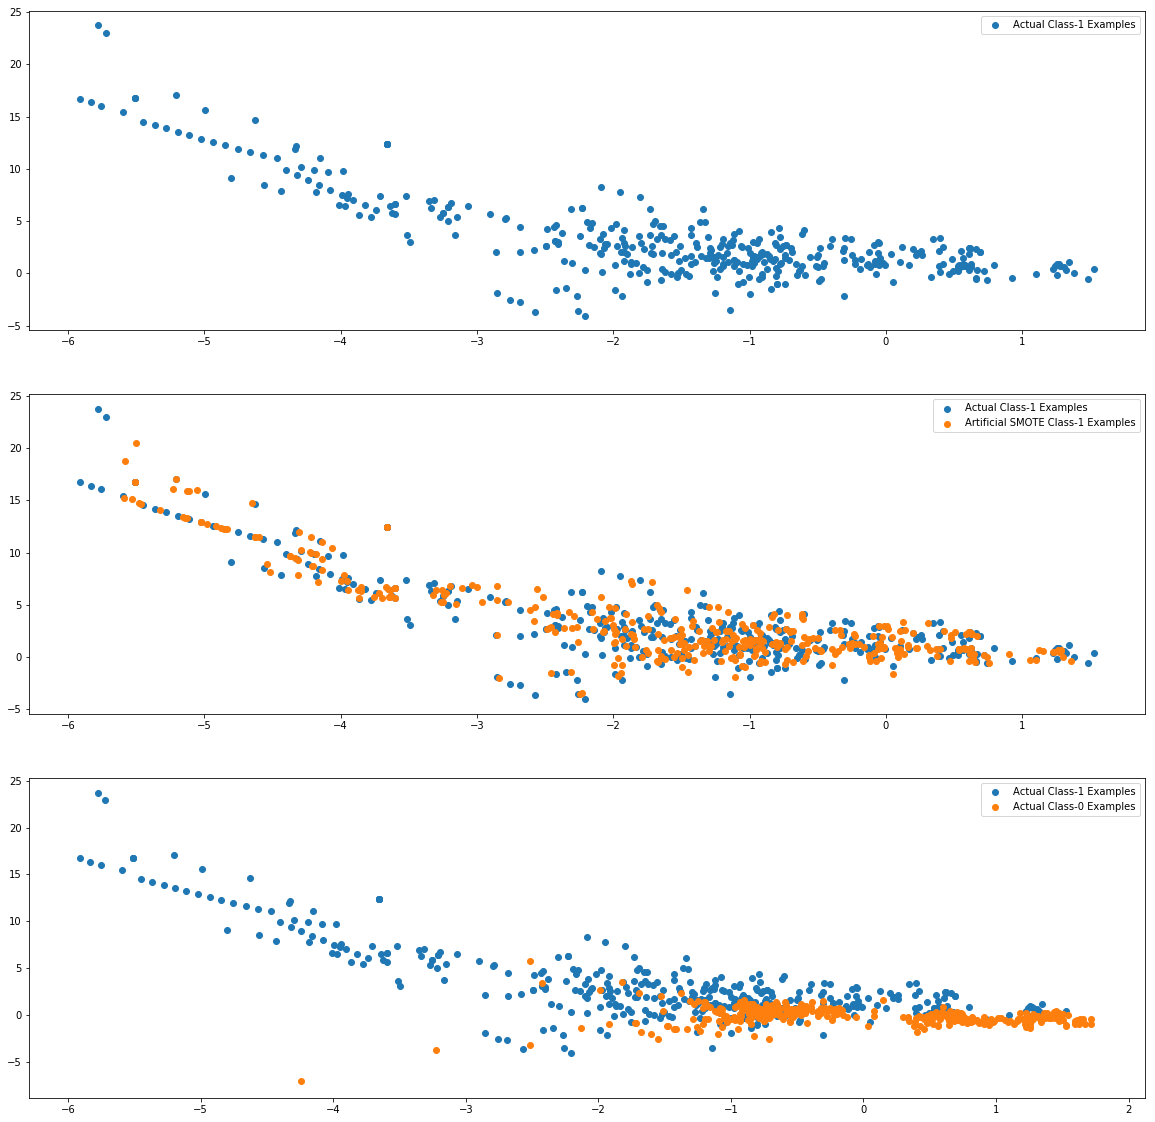

In [107]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]


X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')
    
plt.legend()


plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<font color = "green"><h3><b>1. Logistic Regression on balanced data with SMOTE</b></h3></font>

In [108]:
logistic_smote_model_cv = get_logisticregression_model(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9895153140522103
Best hyperparameters:  {'C': 1000}


In [109]:
# cross validation results
logistic_smote_cv_results = pd.DataFrame(logistic_smote_model_cv.cv_results_)
logistic_smote_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.212721,0.119564,0.052007,0.003292,0.01,{'C': 0.01},0.989840,0.989286,0.989712,0.989212,...,0.989494,0.000243,6,0.989421,0.989508,0.989476,0.989632,0.989508,0.989509,0.000069
1,4.434246,0.076299,0.053559,0.002016,0.1,{'C': 0.1},0.989848,0.989305,0.989745,0.989224,...,0.989514,0.000243,5,0.989447,0.989530,0.989494,0.989647,0.989529,0.989529,0.000066
2,4.474675,0.138362,0.050712,0.001349,1,{'C': 1},0.989847,0.989306,0.989747,0.989224,...,0.989515,0.000244,4,0.989448,0.989531,0.989494,0.989648,0.989530,0.989530,0.000066
3,4.382485,0.060868,0.051296,0.001666,10,{'C': 10},0.989847,0.989306,0.989747,0.989224,...,0.989515,0.000244,3,0.989449,0.989532,0.989494,0.989648,0.989530,0.989530,0.000066
4,4.469963,0.066546,0.052963,0.001839,100,{'C': 100},0.989847,0.989306,0.989747,0.989224,...,0.989515,0.000244,2,0.989449,0.989532,0.989494,0.989648,0.989530,0.989530,0.000066
5,3.866644,0.720183,0.043392,0.009546,1000,{'C': 1000},0.989847,0.989306,0.989747,0.989224,...,0.989515,0.000244,1,0.989449,0.989532,0.989494,0.989648,0.989530,0.989530,0.000066


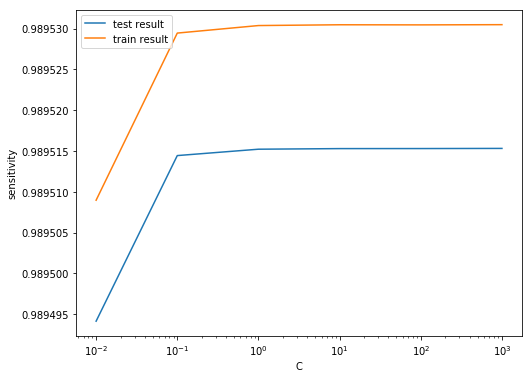

In [110]:
plot_C_train_validation_scores(logistic_smote_cv_results)

<font color = "green"><h3><b>Logistic Regression with optimal C</b></h3></font>

In [113]:
# Printing best params
logistic_smote_model_cv.best_params_

{'C': 1000}

In [114]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=logistic_smote_model_cv.best_params_['C'])

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

<font color = "green"><h3><b>Evaluating the model on train data</b></h3></font>

In [115]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
print_scores(y_train_smote, y_train_pred)

F1 Score: 94.73%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



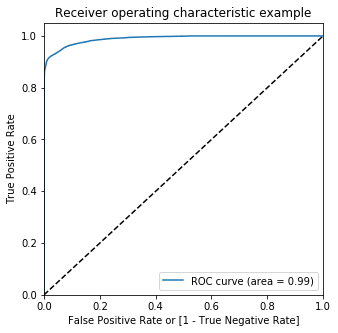

In [116]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba_smote)

<font color = "green"><h3><b>Evaluating on test data</b></h3></font>

In [117]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
print_scores(y_test, y_test_pred)

F1 Score: 10.84%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



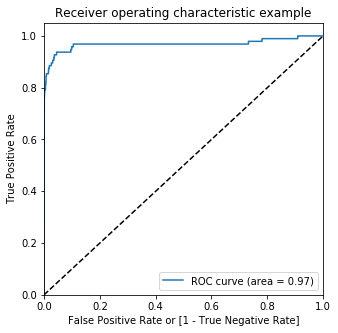

In [118]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba_smote)

<font color = "green"><h3><b>Model Summary</b></h3></font>
- Train set
    - ROC score : 99%
    - F1 score: 94.73%
- Test set
    - ROC score : 97%
    - F1 score: 10.84%

<font color = "green"><h3><b>2. Decision Tree on balanced data with SMOTE</b></h3></font>

In [119]:
smote_grid_search = get_decisiontree_model(X_train_smote, y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [120]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", smote_grid_search.best_score_)
print(smote_grid_search.best_estimator_)

Best roc auc score :  0.9973346927333583
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


<font color = "green"><h3><b>Model with optimal hyperparameters</b></h3></font>

In [121]:
smote_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [122]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth= smote_grid_search.best_estimator_.max_depth, 
                                  min_samples_leaf= smote_grid_search.best_estimator_.min_samples_leaf,
                                  min_samples_split= smote_grid_search.best_estimator_.min_samples_split)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

<font color = "green"><h3><b>Evaluating the model on train data</b></h3></font>

In [123]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
print_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.63%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227449
           1       0.99      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



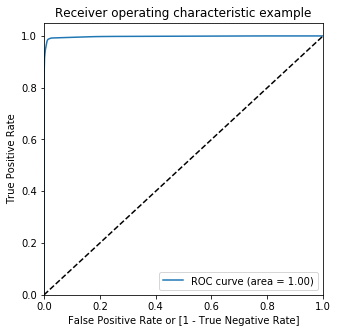

In [124]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on the test set</b></h3></font>

In [125]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 13.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.77      0.14        96

    accuracy                           0.98     56962
   macro avg       0.54      0.88      0.56     56962
weighted avg       1.00      0.98      0.99     56962



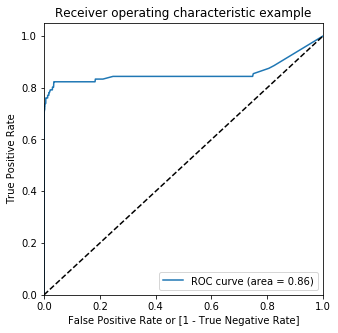

In [126]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_smote)

<font color = "green"><h3><b>Model Summary</b></h3></font>
 
- Train set
    - ROC score : 100%
    - F1 score: 98.63%
- Test set
    - ROC score : 86%
    - F1 score: 13.73%

<font color = "green"><h3><b>3. XGBoost on balanced data with SMOTE</b></h3></font>

In [127]:
smote_xgboost_model_cv = get_xgboost_model(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:29:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

In [128]:
# cv results
xgboost_cv_results = pd.DataFrame(smote_xgboost_model_cv.cv_results_)
xgboost_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.254791,0.011785,0.188493,0.002992,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999661,0.999729,0.999676,0.999688,0.000029,4,0.999713,0.999720,0.999732,0.999722,0.000008
1,53.204571,0.291804,0.191489,0.001556,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999669,0.999730,0.999646,0.999682,0.000035,5,0.999726,0.999729,0.999712,0.999722,0.000008
2,66.517936,0.037452,0.188030,0.009112,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999679,0.999697,0.999649,0.999675,0.000020,6,0.999721,0.999693,0.999720,0.999711,0.000013
3,36.554127,0.210457,0.194470,0.000930,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999964,0.999952,0.999953,0.999957,0.000005,2,0.999979,0.999971,0.999983,0.999978,0.000005
4,54.028191,0.384784,0.196927,0.002076,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999958,0.999955,0.999937,0.999950,0.000009,3,0.999986,0.999982,0.999980,0.999982,0.000003
5,66.799028,0.341968,0.195774,0.000812,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999964,0.999962,0.999954,0.999960,0.000004,1,0.999983,0.999984,0.999980,0.999982,0.000002


In [129]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", smote_xgboost_model_cv.best_score_)
print(smote_xgboost_model_cv.best_estimator_)

Best roc auc score :  0.9999601334660033
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


<font color = "green"><h3><b>Model with optimal hyperparameter</b></h3></font>

In [130]:
smote_xgboost_model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [131]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': smote_xgboost_model_cv.best_estimator_.learning_rate,
          'max_depth': smote_xgboost_model_cv.best_estimator_.max_depth, 
          'n_estimators':smote_xgboost_model_cv.best_estimator_.n_estimators,
          'subsample':smote_xgboost_model_cv.best_estimator_.subsample,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[12:46:38] WARNING: ../src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:46:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<font color = "green"><h3><b>Evaluating the model on the train data</b></h3></font>

In [132]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
print_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



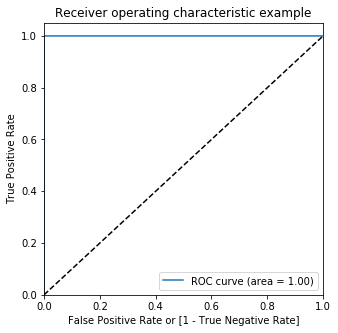

In [133]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on test data</b></h3></font>

In [134]:
y_pred = xgb_smote_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 72.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.67      0.79      0.72        96

    accuracy                           1.00     56962
   macro avg       0.83      0.90      0.86     56962
weighted avg       1.00      1.00      1.00     56962



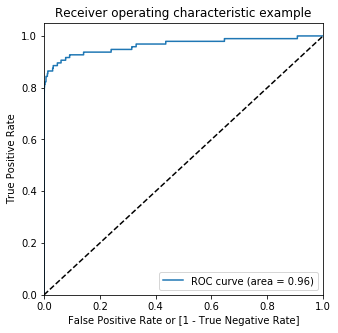

In [135]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>
 
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 96%
    - F1 score: 72.38%

<font color = "green"><h3><b>Print the class distribution after applying ADASYN</b></h3></font> 

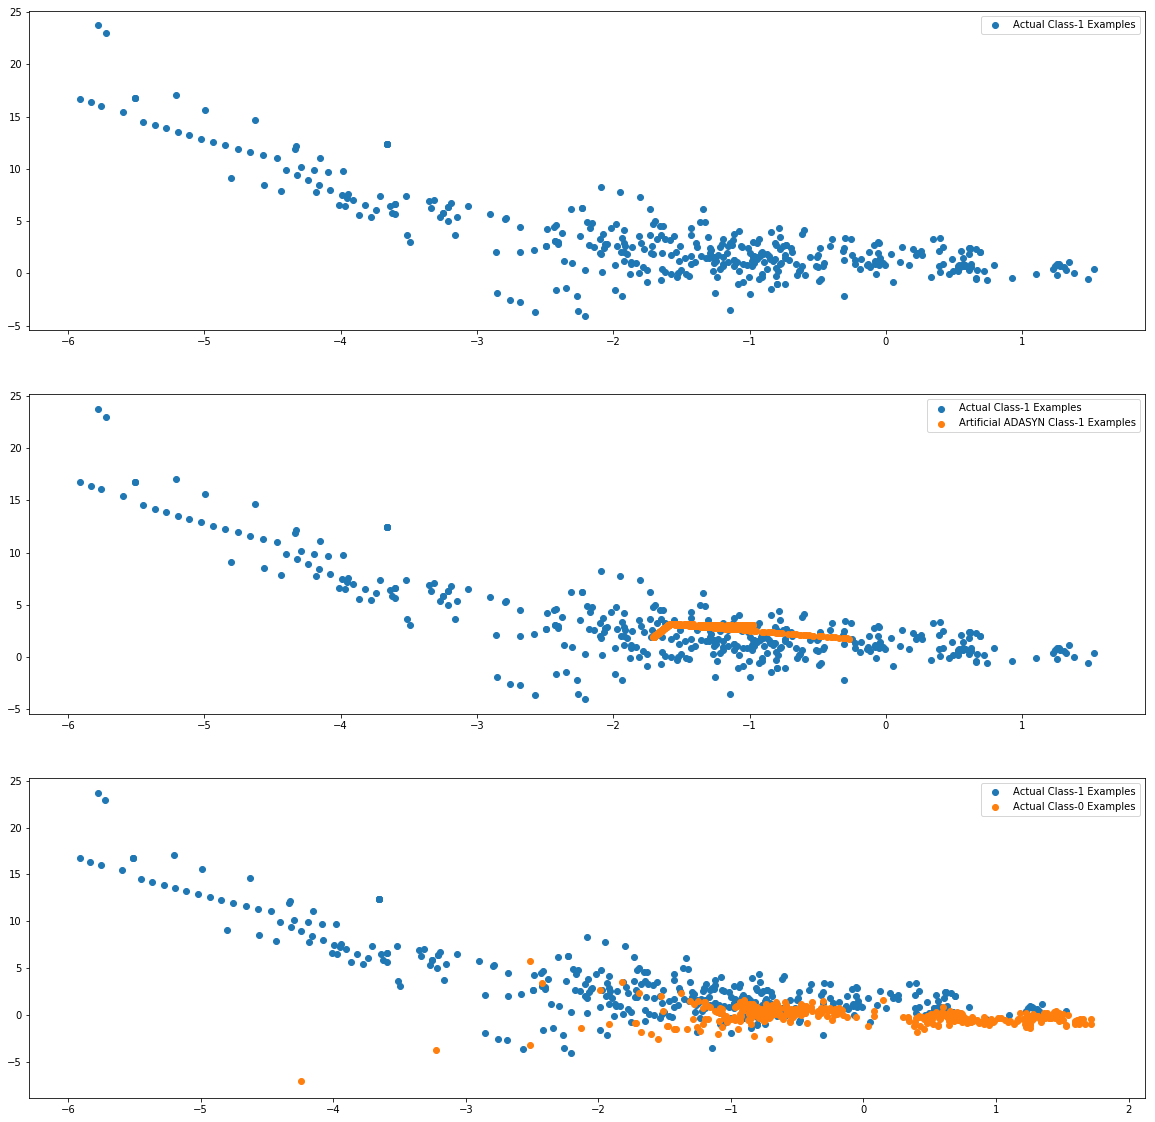

In [136]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<font color = "green"><h3><b>ADASYN (Adaptive Synthetic Sampling)</b></h3></font>

<font color = "green"><h3><b>1. Logistic Regression on balanced data with ADASYN</b></h3></font>

In [137]:
ad_model_cv = get_logisticregression_model(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9614382787455129
Best hyperparameters:  {'C': 1000}


In [138]:
# cross validation results
ad_cv_results = pd.DataFrame(ad_model_cv.cv_results_)
ad_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.966386,0.195666,0.052481,0.003598,0.01,{'C': 0.01},0.961728,0.961275,0.961638,0.960631,...,0.961337,0.000388,6,0.961271,0.961275,0.961255,0.961721,0.961288,0.961362,0.000180
1,3.966481,0.073263,0.049945,0.002186,0.1,{'C': 0.1},0.961790,0.961403,0.961752,0.960693,...,0.961430,0.000396,5,0.961373,0.961365,0.961344,0.961812,0.961381,0.961455,0.000179
2,3.809306,0.131725,0.052796,0.003116,1,{'C': 1},0.961793,0.961414,0.961762,0.960697,...,0.961437,0.000397,4,0.961382,0.961372,0.961351,0.961819,0.961388,0.961462,0.000179
3,4.051479,0.149118,0.053982,0.000863,10,{'C': 10},0.961793,0.961415,0.961763,0.960697,...,0.961438,0.000397,3,0.961382,0.961373,0.961352,0.961819,0.961389,0.961463,0.000179
4,4.032450,0.307374,0.054582,0.003281,100,{'C': 100},0.961794,0.961415,0.961763,0.960697,...,0.961438,0.000397,2,0.961382,0.961373,0.961352,0.961819,0.961389,0.961463,0.000179
5,3.488612,0.712143,0.046591,0.012045,1000,{'C': 1000},0.961794,0.961415,0.961763,0.960697,...,0.961438,0.000397,1,0.961383,0.961373,0.961352,0.961819,0.961389,0.961463,0.000179


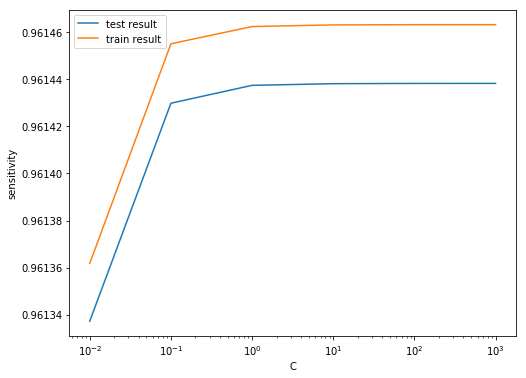

In [139]:
plot_C_train_validation_scores(ad_cv_results)

<font color = "green"><h3><b>Logistic Regression with optimal C</b></h3></font>

In [140]:
ad_model_cv.best_params_

{'C': 1000}

In [141]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=ad_model_cv.best_params_['C'])

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

<font color = "green"><h3><b>Evaluating the model with train data</b></h3></font>

In [142]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
print_scores(y_train_adasyn, y_train_pred)

F1 Score: 87.94%
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89    227449
           1       0.90      0.86      0.88    227448

    accuracy                           0.88    454897
   macro avg       0.88      0.88      0.88    454897
weighted avg       0.88      0.88      0.88    454897



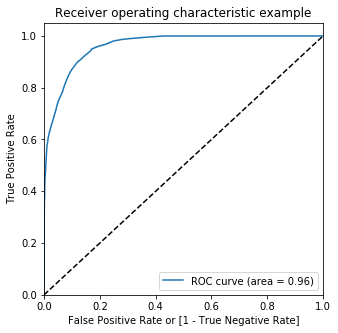

In [143]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating on test data</b></h3></font>

In [144]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 3.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



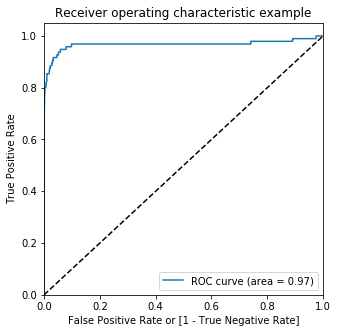

In [145]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>
- Train set
    - ROC score : 96%
    - F1 score: 87.94%
- Test set
    - ROC score : 97%
    - F1 score: 3.32%

<font color = "green"><h3><b>2. Decision Tree on balanced data with ADASYN</b></h3></font>

In [146]:
ad_grid_search = get_decisiontree_model(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [147]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", ad_grid_search.best_score_)
print(ad_grid_search.best_estimator_)

Best roc auc score :  0.908077392994514
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


<font color = "green"><h3><b>Model with optimal hyperparameters</b></h3></font>

In [149]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=ad_grid_search.best_estimator_.max_depth, 
                                  min_samples_leaf=ad_grid_search.best_estimator_.min_samples_leaf,
                                  min_samples_split=ad_grid_search.best_estimator_.min_samples_split)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

<font color = "green"><h3><b>Evaluating the model on train data</b></h3></font>

In [150]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
print_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.35%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    227449
           1       0.96      0.99      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



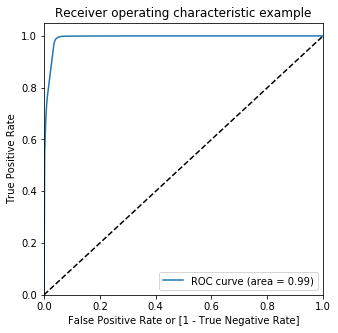

In [151]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on the test set</b></h3></font>

In [152]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 5.97%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.85      0.06        96

    accuracy                           0.95     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.95      0.98     56962



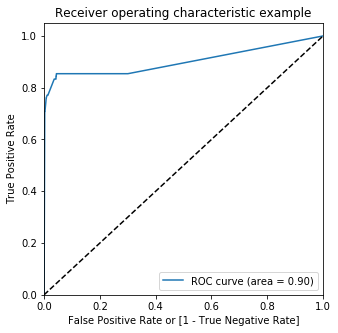

In [153]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>
- Train set
    - ROC score : 99%
    - F1 score: 97.35%
- Test set
    - ROC score : 90%
    - F1 score: 5.97%

<font color = "green"><h3><b>3. XGBoost on balanced data with ADASYN</b></h3></font>

In [154]:
ad_xg_model_cv = get_xgboost_model(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:59:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

In [155]:
# cv results
ad_xg_cv_results = pd.DataFrame(ad_xg_model_cv.cv_results_)
ad_xg_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.948160,0.330667,0.187552,0.003140,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.957004,0.994551,0.990499,0.980685,0.016826,5,0.999401,0.999237,0.999122,0.999253,0.000114
1,53.641629,0.132968,0.185260,0.002749,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.958639,0.994801,0.990867,0.981436,0.016200,3,0.999340,0.999163,0.999081,0.999195,0.000108
2,66.686402,0.719798,0.181674,0.008190,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.954829,0.995092,0.990151,0.980024,0.017929,6,0.999381,0.999176,0.999122,0.999226,0.000111
3,36.661540,0.361591,0.187059,0.002599,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959183,0.996362,0.996363,0.983969,0.017527,2,0.999961,0.999943,0.999934,0.999946,0.000011
4,53.521112,0.091618,0.182784,0.002042,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.961098,0.997799,0.997858,0.985585,0.017315,1,0.999941,0.999943,0.999941,0.999942,0.000001
5,66.067507,0.264083,0.186696,0.002458,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.948643,0.997191,0.997181,0.981005,0.022883,4,0.999958,0.999947,0.999939,0.999948,0.000008


In [156]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", ad_xg_model_cv.best_score_)
print(ad_xg_model_cv.best_estimator_)

Best roc auc score :  0.985584888360918
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


<font color = "green"><h3><b>Model with optimal hyperparameter</b></h3></font>

In [157]:
ad_xg_model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [158]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': ad_xg_model_cv.best_estimator_.learning_rate,
          'max_depth': ad_xg_model_cv.best_estimator_.max_depth, 
          'n_estimators':ad_xg_model_cv.best_estimator_.n_estimators,
          'subsample':ad_xg_model_cv.best_estimator_.subsample,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[13:16:25] WARNING: ../src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<font color = "green"><h3><b>Evaluating the model on the train data</b></h3></font>

In [159]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
print_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



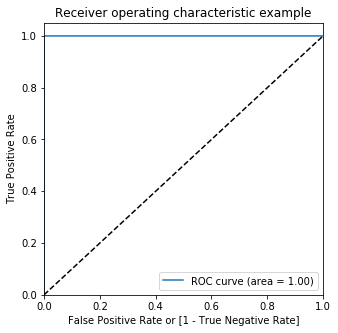

In [160]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

<font color = "green"><h3><b>Evaluating the model on test data</b></h3></font>

In [161]:
y_pred = xgb_adasyn_model.predict(X_test)
print_scores(y_test, y_pred)

F1 Score: 70.09%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.64      0.78      0.70        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



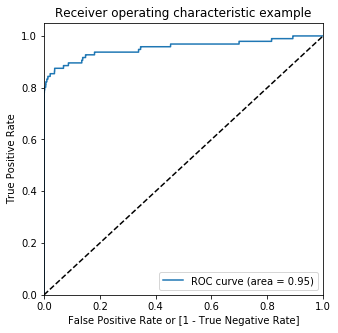

In [162]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

<font color = "green"><h3><b>Model Summary</b></h3></font>
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 95%
    - F1 score: 70.09%

Select the oversampling method which shows the best result on a model

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 95% on the test data and F1 score 100% on train data and 70.09% in the test data.

Hence, we conclude that the XGBoost model with Adasyn is the best model.

In [163]:
final_model = get_final_xgboost_model(X_train_adasyn, y_train_adasyn)

[13:19:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


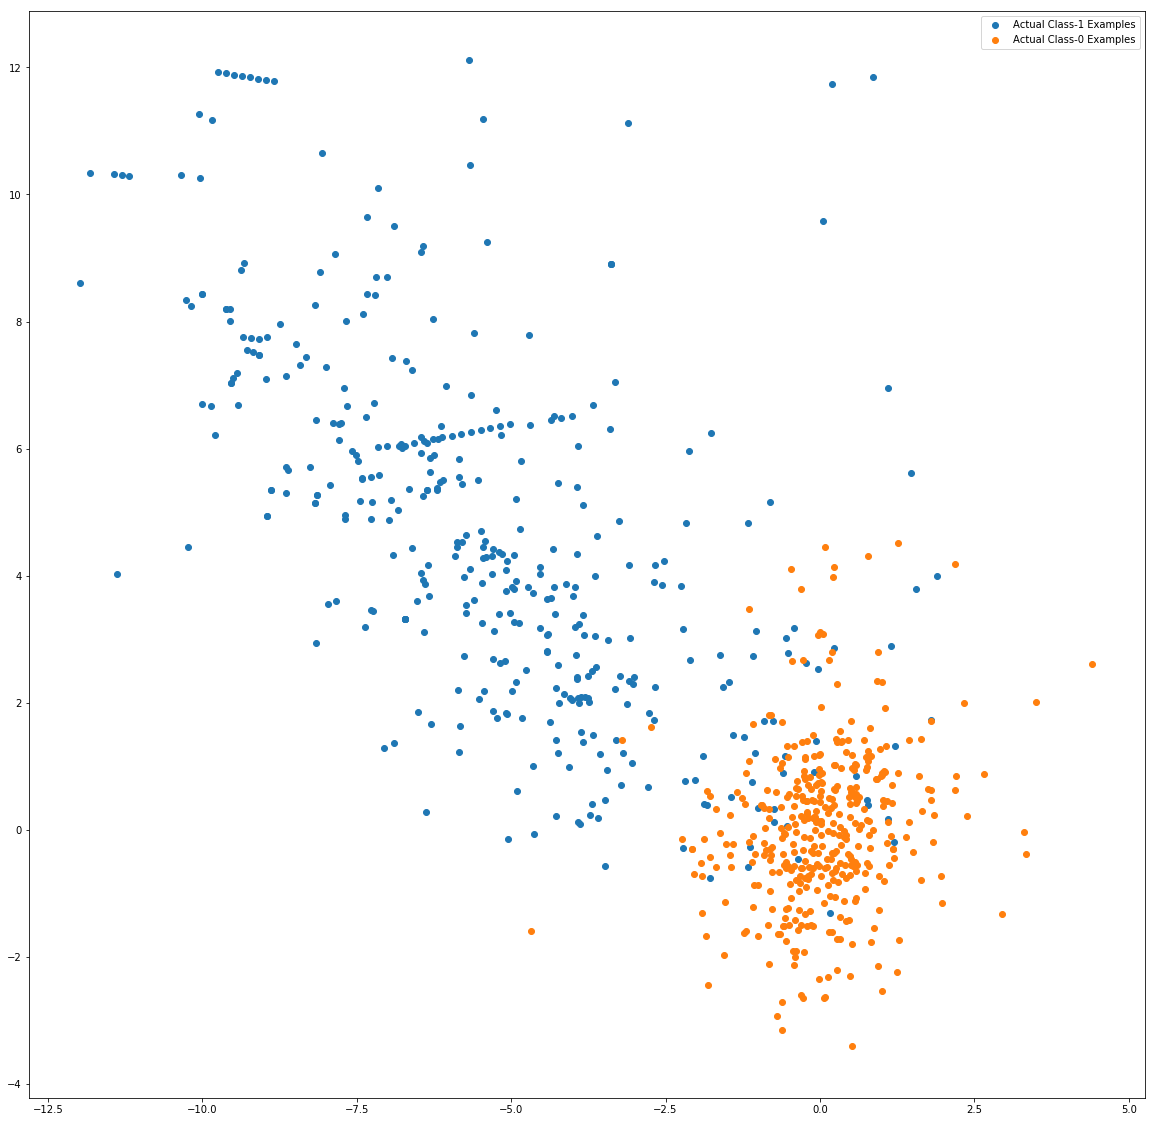

In [164]:
var_imp = []
for i in final_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [165]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9270398


<font color = "green"><h3><b>Summary to the business</b></h3></font>

Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(95%) and also high Recall(89%). Hence, we can go with the XGBoost model here.